# **Scratch Assay Wound Healing Analysis Using Python (skimage)**
---

## **Overview**
This notebook processes a series of images from a scratch assay wound healing experiment. The goal is to measure the area of the wound over time using entropy-based segmentation and thresholding techniques. The results are visualized, and a linear regression is performed to analyze the rate of wound healing.

## **1. Importing Required Libraries**
- This cell imports the necessary libraries for image loading `io`, entropy filtering `entropy`, morphological operations `disk`, thresholding `threshold_otsu`, file handling `glob`, `os`, `zipfile`, and statistical analysis `linregress`.

In [46]:
import glob
import zipfile
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.filters import threshold_otsu
from scipy.stats import linregress

## **2. Loading and Displaying the Scratch Assay Image**
- The scratch assay image is loaded and displayed in grayscale. This image serves as the base for entropy analysis and thresholding.

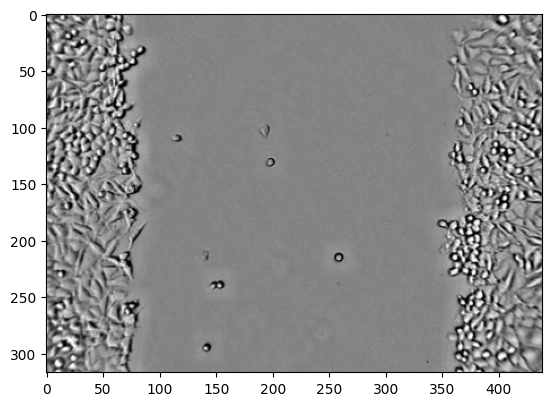

In [8]:
img = io.imread("/content/scratch.png", as_gray=True)
plt.imshow(img, cmap="gray");

## **3. Calculating Entropy of the Image**
- The entropy of the image is calculated using a disk-shaped structuring element of radius 10. Entropy is a measure of randomness in the pixel intensity values and is used here to highlight the difference between the scratch (wound) and the surrounding cells.

**Parameters & Variations**:
- `disk()`: The size of the disk can be adjusted to capture more or fewer details based on the image resolution.

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


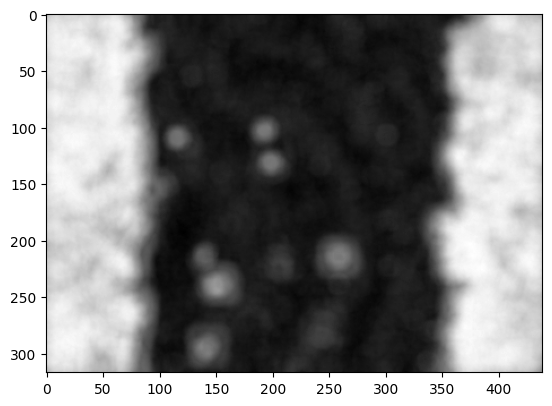

In [12]:
entropy_img = entropy(img, disk(10))
plt.imshow(entropy_img, cmap="gray");

## **4. Otsu's Thresholding on Entropy Image**
- Otsu’s method is applied to the entropy image to find an optimal threshold value. The binary mask is created by classifying pixels with entropy values less than or equal to the threshold as part of the wound area.

**Parameters & Variations**:
- The threshold value is dynamically determined by Otsu's method, but other methods like adaptive or fixed thresholding can be applied for different results.

Threshold value: 4.91



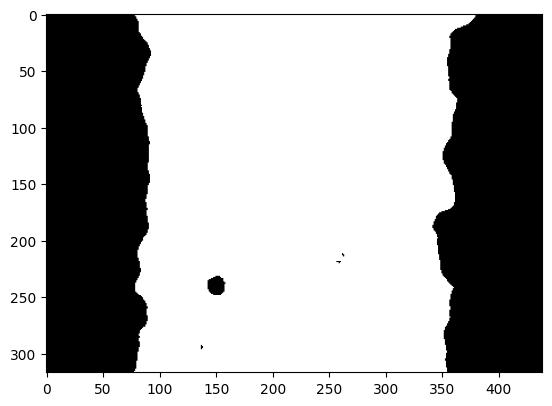

In [16]:
threshold = threshold_otsu(entropy_img)
mask = entropy_img <= threshold
plt.imshow(mask, cmap="gray");
print(f"Threshold value: {threshold:.2f}\n")

## **5. Calculating and Displaying Total White Pixels (Wound Area)**
- This cell calculates the total number of white pixels in the binary mask, which represents the wound area in the scratch assay image.

In [18]:
print(f"Total number of white pixels: {np.sum(mask == 1)}")

Total number of white pixels: 85268


## **6. Extracting Scratch Assay Images from a Zip File**
- The zip file containing a series of scratch assay images is extracted. Each image represents the wound at a different time point during the assay.

In [23]:
zip_file_path = "/content/Scratch Images.zip"

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall()

## **7. Initializing Time Variables and Lists**
- This section initializes the time variable and lists to store timestamps and wound area measurements. The `file_path` variable defines the directory containing the extracted images.

In [43]:
time = 0
timestamps = []
area = []
file_path = "/content/Scratch Images/*.*"

## **8. Processing and Analyzing Scratch Assay Images Over Time**
- This cell processes all the scratch assay images extracted from the zip file. Each image is analyzed using entropy filtering and Otsu’s thresholding to create a binary mask representing the wound area.
For each image, the scratch area is calculated (as the number of white pixels in the binary mask) and stored in the `area` list along with the corresponding `time`.
- Files are sorted by their time points extracted from the filename.

In [44]:
files = glob.glob(file_path)
files_sorted = sorted(files, key=lambda x: int(os.path.basename(x).split('Scratch')[-1].split('.')[0]))

for file in files_sorted:
    if os.path.isfile(file):
        try:
            image = io.imread(file)
            entropy_image = entropy(image, disk(10))
            threshold_value = threshold_otsu(entropy_image)
            binary_mask = entropy_image <= threshold_value
            scratch_area = np.sum(binary_mask == True)
            print(f"Time {time} - Pixels in binary mask: {scratch_area}")
            timestamps.append(time)
            area.append(scratch_area)
            time += 1
        except Exception as e:
            print(f"Error processing {file}: {e}")

Time 0 - Pixels in binary mask: 34396
Time 1 - Pixels in binary mask: 28538
Time 2 - Pixels in binary mask: 23923
Time 3 - Pixels in binary mask: 20729
Time 4 - Pixels in binary mask: 18280
Time 5 - Pixels in binary mask: 15761
Time 6 - Pixels in binary mask: 14236
Time 7 - Pixels in binary mask: 12658
Time 8 - Pixels in binary mask: 10949
Time 9 - Pixels in binary mask: 8855


## **9. Performing Linear Regression on Wound Area Over Time**
- A linear regression is performed on the wound area (dependent variable) against time (independent variable). This helps determine the rate of wound healing over time.
- The equation of the line (`y = mx + b`) is printed, where `slope` indicates the healing rate, and the `r-value` shows the goodness of fit (correlation between time and wound area).

In [49]:
slope, intrecept, r_value, p_value, std_err = linregress(timestamps, area)
print(f"y = {slope:.3f}x + {intrecept:.3f}")
print(f"R-value: {r_value:.3f}")

y = -2614.030x + 30595.636
R-value: -0.972


## **10. Visualizing Scratch Area Over Time**
- This cell plots the wound area as a function of time, providing a visual representation of the healing process over time.
- The blue dots (`"bo"`) represent the wound area measurements at each time point.

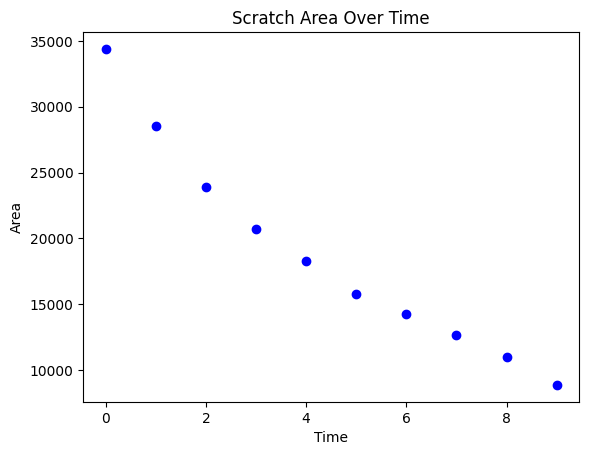

In [45]:
plt.plot(timestamps, area, "bo")
plt.xlabel("Time")
plt.ylabel("Area")
plt.title("Scratch Area Over Time")
plt.show();